<a href="https://colab.research.google.com/github/vaorsigordo/Bootcamp-Data_Science_Aplicada-ALURA/blob/main/BootcampALURA_Modulo1_Internacoes_SUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
***

#<font color = #471DCC>**Exploração de Dados do Datasus - Período Jan 2008 - Ago 2020**

***
***

##### <font color = #471DCC>PROCEDIMENTOS HOSPITALARES DO SUS - POR LOCAL DE INTERNAÇÃO - BRASIL

***

---
# AULA 1 - Aquisição e leitura de dados reais - PROCESSAMENTO
--- 

### Importanto as Bibliotecas

In [ ]:
## importanto biblioteca
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

### Importanto os Dados


In [ ]:
'''        
Legenda Dados:      
-  Dados númerico igual a 0 não resultante de arredondamento
0  Dados númerico igual a 0 resultante de arredondamento de um dado originalmente positivo
'''
## lendo os dados e criando uma variável dados
dados = pd.read_csv("/content/drive/My Drive/Colab Notebooks/BootcampDataScience_Alura/Procedimentos_Hospitares_SUS_Processamento.csv", 
                    encoding="ISO-8859-1",skiprows = 3, sep = ";", skipfooter=12,
                    thousands=".", decimal=",")
'''
pode inserir na_values = '-' na importação:
dados = pd.read_csv("/content/Procedimentos_Hospitares_SUS_Atendimento.csv", 
                    encoding="ISO-8859-1", skiprows = 3, sep = ";", 
                    skipfooter=12,thousands=".", decimal=",", na_values = '-')

 ele já substitui o "-" por NaN dentro do DataFrame
'''
#para ver as primeiras 5 linhas dos dados
dados.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,9.291297e+08
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,-,4.206680e+08
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1.771655e+09
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2755620.24,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3020718.84

## Explorando e Visualizando os Dados

In [ ]:
# Visualizando o dados aleatoriamente
dados.sample(3)

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
12,26 Pernambuco,14393949.89,24181400.95,29991302.71,34806197.97,32147987.35,32239094.89,32685640.76,35457038.66,33668261.46,30579747.51,31049830.56,36978451.28,31009217.35,32989186.42,35816570.57,35969258.01,38381369.46,37147961.64,37200037.82,37050387.71,37971068.17,39339518.15,38448709.00,36961718.24,35052507.08,32870997.66,36490461.92,39185802.19,39388462.04,38249606.84,36955723.87,40351864.49,37229907.82,40700808.63,41625911.29,39731003.01,38314655.92,38704974.94,38270479.93,...,69573373.69,69762828.96,68099323.25,67999680.35,66978897.02,64734221.71,65819921.92,64529749.62,59258351.04,67792662.95,66491472.88,71014021.26,68679138.11,70741826.35,70554341.99,66806054.81,67067611.96,64375684.10,63347814.94,66767187.21,63012036.07,65485622.52,65026872.36,71675203.64,68052177.03,71002753.56,70105175.96,69751772.00,73231387.37,69912310.76,65707157.96,70148903.54,64813148.37,66199027.74,49206139.44,58837630.45,63987469.53,74192800.58,75704177.72,8.046954e+09
6,17 Tocantins,3441592.69,4985688.85,6205612.60,4984482.09,5511002.46,4927934.22,5445602.28,5413710.38,5596669.50,4658414.01,5252451.80,5523443.70,5791656.63,5814388.89,6273994.59,6762806.93,6575718.57,6423393.40,6349231.85,6490519.50,6542918.14,6420058.63,6149491.80,6075178.19,6411312.84,6403262.51,6698840.55,6905354.41,6864576.47,6876811.94,6732224.34,7110923.00,6644145.62,6861920.56,6553013.61,6450647.82,6695049.17,6735950.07,7285116.46,...,6392708.38,5837072.54,6608301.60,6155701.19,5104089.76,5441162.74,5200789.02,5341353.03,5361684.48,5913061.01,4617378.68,4662238.24,5664149.36,5328909.25,5473666.63,5152490.73,5272355.92,4873715.59,5321091.08,5791079.68,5881439.69,6593258.41,6684401.50,7143806.13,6136528.26,7118118.28,7607639.98,8498162.91,7181834.26,6467132.92,7210731.09,8096781.90,7022324.92,7209045.59,6390358.03,6697839.73,7384806.71,9131707.60,8240261.38,9.999986e+08
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1.771655e+09


In [ ]:
#para ver as últimas 5 linhas dos dados (DataFrame)
dados.tail()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
22,43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,53637713.13,53699506.08,58730379.58,57629317.06,58779088.02,63366430.89,62200230.97,61683824.68,62495363.90,64614271.83,66457445.34,66425009.36,65782428.73,63714541.87,64488493.88,66304168.50,61527419.52,62490522.38,66814413.40,67900518.35,64799726.75,68518232.07,68731297.03,66174969.16,66891309.48,67456434.73,67096302.52,60754144.32,58884339.85,66205364.40,...,89585823.81,96174533.70,92176170.61,94228360.83,90655015.78,91242720.70,82934746.93,88817066.36,80572288.45,87419899.25,89396935.52,88148251.61,90754504.49,89093690.14,94010888.97,93664724.68,90025945.36,93081292.31,89050712.34,89664703.23,89259306.50,85585754.75,95152786.47,94163838.23,92237333.46,1.022983e+08,1.002601e+08,95917106.56,1.023316e+08,93971904.79,90775418.13,94908336.74,91437940.91,1.028761e+08,83000318.02,82381774.95,86051002.13,1.005310e+08,101374341.51,1.195865e+10
23,50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,9547923.55,9450010.19,8365709.79,10033643.71,10746263.10,10849523.03,10902848.13,11991649.26,12050259.66,12174950.98,11178470.01,11997775.92,11686533.15,10756188.43,10565385.71,12148432.58,11270972.80,11947693.50,11435565.54,12392541.52,12441459.98,12025317.84,12353546.78,12381792.58,12340247.31,12467693.91,12356930.32,11209008.55,9656677.02,13698836.79,...,15676843.15,16956118.78,17043069.32,17477126.81,15488155.75,16596703.72,15353997.67,16320629.25,18448053.83,16620321.36,16682027.02,17555832.83,17357780.20,17090876.79,16468255.95,17395858.50,16259261.13,16390075.24,15350893.92,17108719.02,17713810.57,16882690.96,18253870.27,17778458.45,18387822.48,1.987093e+07,1.891386e+07,19591383.84,1.893544e+07,17230688.81,17895244.76,18115134.64,19542439.88,1.903279e+07,17410262.53,17913161.92,17331445.92,1.875556e+07,19241624.02,2.172158e+09
24,51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,9677093.95,7150345.50,10421826.32,9939399.66,9332546.32,11965500.15,11185014.96,12058150.55,11635436.04,11698836.48,11823239.61,10810420.65,12130636.06,11574096.75,10726251.53,12364760.67,11382133.07,11947040.32,12233217.84,12656421.09,11263407.74,12795267.96,12805173.87,12171713.91,11961452.83,11777799.00,11142684.27,11709080.86,11149107.81,12381255.67,...,15509614.84,16372281.19,16231682.70,16044219.39,16146542.89,15487676.02,14770731.99,17253950.09,14789801.16,17498946.87,16279852.74,16103988.77,15883977.51,17163673.03,15569285.17,15630276.46,15838064.68,14815961.13,13853034.99,14229113.36,15288698.79,16045499.92,15890208.95,16092716.67,16699780.69,1.631481e+07,1.676358e+07,15608982.84,1.585564e+07,15811477.04,15029205.51,15249241.20,15046851.63,1.488682e+07,12546999.04,13604225.34,13151005.63,1.637164e+07,17790649.87,2.036924e+09
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,20621423.04,17094580.10,21615561.61,20678552.05,23043942.78,23334312.45,23508108.16,23947606.91,24369848.15,24577126.64,24372626.65,25227845.74,24746686.90,24628958.50,25524615.37,23352380.22,23520045.07,25369725.89,24404417.4

In [ ]:
#tentar tirar a média
dados.mean()
# Antes de adicionar o separador thousands=".", decimal="," não tinha possivel 
# calcular o mean pois os dados estavam como string e não como números

2008/Jan    1.512685e+07
2008/Fev    2.271016e+07
2008/Mar    2.459419e+07
2008/Abr    2.543196e+07
2008/Mai    2.651125e+07
                ...     
2020/Abr    4.101366e+07
2020/Mai    4.419363e+07
2020/Jun    4.732999e+07
2020/Jul    5.449551e+07
Total       5.993732e+09
Length: 151, dtype: float64

In [ ]:
#Antes de adicionar o separador thousands=".", decimal="," na importação dos
# dados, eles estavam no formato dtypes: object(154)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 154 entries, Unidade da Federação to Total
dtypes: float64(151), object(3)
memory usage: 32.6+ KB


In [ ]:
#vamos mudar a forma de impressão - notação científica 
#para ele formatar ponto flutuante usar duas casas decimais 
pd.options.display.float_format = "{:.2f}".format

In [ ]:
dados.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Abr     41013660.39
2020/Mai     44193633.75
2020/Jun     47329994.46
2020/Jul     54495511.57
Total      5993731798.30
Length: 151, dtype: float64

In [ ]:
# Tamanho do dataset
dados.shape
print('O DataFrame possui {} linhas e {} colunas'.format(dados.shape[0], 
                                                         dados.shape[1]))

O DataFrame possui 27 linhas e 154 colunas


In [ ]:
#acessando um único mês de um ano específico, acessando uma coluna
dados["2008/Ago"]
#este comando acessando uma coluna do DataFrame resulta em uma série
#cada índice é o estado

0      3231494.61
1      2089107.14
2      9352532.70
3       894271.18
4     23341218.03
5      1475551.38
6      5413710.38
7     15195312.89
8     10549176.40
9     27851438.72
10    10640817.47
11    12872578.37
12    35457038.66
13     9373432.00
14     5238398.50
15    46931248.28
16    84722528.10
17    12588595.77
18    50912706.60
19   184854516.35
20    56982774.90
21    31250854.33
22    56113054.70
23     9671553.45
24     9243148.81
25    20650730.67
26    13710857.89
Name: 2008/Ago, dtype: float64

In [ ]:
#é possível acessar a média desta série
dados["2008/Ago"].mean()

27800320.306666665

## DESAFIO 1

####Escolher um título mais descritivo, que passe a mensagem adequada ao gráfico de barras.

In [ ]:
ago_2008 = dados[["Unidade da Federação", "2008/Ago"]].sort_values("2008/Ago")
ago_2008.head(1)

,Unidade da Federação,2008/Ago
3,14 Roraima,894271.18


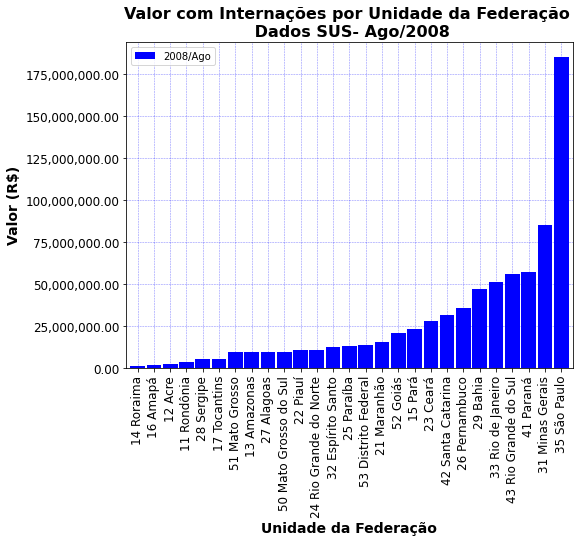

In [ ]:
##DESAFIO 1
ago_2008 = dados[["Unidade da Federação", "2008/Ago"]].sort_values("2008/Ago")

####################### plotar o gráfico de 2008/Ago ###########################
ax = ago_2008.plot(x="Unidade da Federação", y="2008/Ago", kind="bar", 
                figsize=(8,6), width=0.9, color = "b")

########################### Estética do gráfico ################################

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.legend(loc = "upper left", borderaxespad=0.5) #posiciona a legenda
plt.title("Valor com Internações por Unidade da Federação \n Dados SUS- Ago/2008", 
          fontsize = 16, fontweight = "bold") # adiciona título
ax.set_xlabel("Unidade da Federação",fontsize = 14, fontweight = "bold") #nomeia x
ax.set_ylabel("Valor (R$)",fontsize = 14, fontweight = "bold") #nomeia y

ax.tick_params(axis="x", labelsize=12) #modifica o tamanho do tick em x
ax.tick_params(axis="y", labelsize=12) #modifica o tamanho do tick em y

ax.xaxis.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5) #grid em x
ax.yaxis.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5) #grid em y

plt.show()

## DESAFIO 2 - eliminando o missing value

#### Faça a mesma análise realizada em aula, porém para o mês mais recente.

In [ ]:
##DESAFIO 2 
## Primeira tentativa tive erro e observei ser devido a valor faltante "-""
ax = dados.plot(x="Unidade da Federação", y="2020/Ago", kind="bar", figsize=(8,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Gastos Internações por Estados")
plt.show()

TypeError: ignored

In [ ]:
## o item 1 (12 Acre) tem um valor faltando na coluna, observe:
dados.head(2)

In [ ]:
# dados.isnull().head() # nao detectou desta forma pois esta preenchido por -
# dados.isna().head() # nao detectou desta forma pois esta preenchido por -
dados["2020/Ago"]

In [ ]:
#Substituir "-" por "NaN"
dados.replace(to_replace="-", value=np.nan, inplace=True)
dados.head(2)

In [ ]:
#verificar se tem valores nulos
dados.isnull().sum()

In [ ]:
#observe que a série agora é dtype: object e não float64 como no exemplo 
# anterior "2008/Ago" por isto não estava consiguindo plotar
dados["2020/Ago"]

In [ ]:
#Substituir "NaN" por "0.00"
dados.fillna(float(0), inplace=True)
dados.head(2)

In [ ]:
dados["2020/Ago"].head(2)

In [ ]:
#convertendo a série dados["2020/Ago"] de dtype: object para
#dtype: float64
dados = dados.astype({"2020/Ago":float})

## DESAFIO 2 - GRÁFICOS

#### Faça a mesma análise realizada em aula, porém para o mês mais recente.

In [ ]:
# gerar um DataFrame menor : lista de "Unidade da Federação" e "2020/Ago" e ordenar 
ago_2020 = dados[["Unidade da Federação", "2020/Ago"]].sort_values("2020/Ago")
ago_2020.head(2)

In [ ]:
#comparando o investimento/gastos em internação de todos os estados comparados com SP
porc_SP = ago_2020["2020/Ago"]/346512263.17
porc_SP*100.head(2)

In [ ]:
# gerar um DataFrame menor : lista de "Unidade da Federação" e "2020/Ago" e ordenar 
ago_2020 = dados[["Unidade da Federação", "2020/Ago"]].sort_values("2020/Ago")
#remover o número da Unidade de Federação
uf = ago_2020["Unidade da Federação"].str.slice(start=3)#série uf short
uf.head(2)
#Deixa o eixo em unidades de Milhão
ago_2020 = ago_2020["2020/Ago"]/1000000
ago_2020.head(2)
#juntas as duas séries criadas
dados_uf_ago_2020=pd.concat([uf,ago_2020], axis=1)
dados_uf_ago_2020.head(2)

In [ ]:
####################### plotar o gráfico de 2020/Ago ###########################

ax = dados_uf_ago_2020.plot.bar(x="Unidade da Federação",y="2020/Ago", 
                figsize=(8,10), width=0.9, color = "b")

########################### Estética do gráfico ################################

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.legend(loc = "upper left", borderaxespad=0.5) #posiciona a legenda
plt.title("Valor com Internações por Unidade da Federação \n Dados SUS- Ago/2020", 
          fontsize = 16, fontweight = "bold") # adiciona título
ax.set_xlabel("Unidade da Federação",fontsize = 14, fontweight = "bold") #nomeia x
ax.set_ylabel("Valor (Milhões de R$)",fontsize = 14, fontweight = "bold") #nomeia y

ax.tick_params(axis="x", labelsize=12) #modifica o tamanho do tick em x
ax.tick_params(axis="y", labelsize=12) #modifica o tamanho do tick em y

ax.xaxis.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5) #grid em x
ax.yaxis.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5) #grid em y


plt.show()

In [ ]:
dados_uf_ago_2020.head(2)

In [ ]:
#setando o index
dados_ago_2020_index = dados_uf_ago_2020.set_index("Unidade da Federação")
dados_ago_2020_index.head(2)

In [ ]:
#Aparece um erro KeyError: 'Unidade da Federação'
#este erro aparece pois ele não encontra x="Unidade da Federação" na coluna mais
#não precisa colocar o valor de x pois o DataFrame que foi gerado 
# já tem as informações necessárias e vai conseguir plotar
dados_ago_2020_index.plot(x="Unidade da Federação",y="2020/Ago",kind="barh")

In [ ]:
#plotagem pelo dado que foi transposto

####################### plotar o gráfico de 2020/Ago ###########################

dados_ago_2020_index.plot(kind="barh",figsize=(8,10), width=0.9, 
                               color = "blue", tick_label = "12")

########################### Estética do gráfico ################################

#ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.legend(loc = "lower right", borderaxespad=0.5) #posiciona a legenda
plt.title("Valor com Internações por Unidade da Federação \n Dados SUS- Ago/2020", 
          fontsize = 16, fontweight = "bold") # adiciona título
plt.xlabel("Valor (Milhões de R$)",fontsize = 14, fontweight = "bold") #nomeia x
plt.ylabel("Unidade da Federação",fontsize = 14, fontweight = "bold") #nomeia y

plt.tick_params(axis="x", labelsize=12) #modifica o tamanho do tick em x
plt.tick_params(axis="y", labelsize=12) #modifica o tamanho do tick em y

plt.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

**Comentários**
  O gráfico ilusta o valor (em milhões de reais) de internações do SUS por unidade federativa dados processados no mês de agosto de 2020.
  
  Observamos um maior valor no estado de São Paulo (SP) com a relação a qualquer outro estado da Federação. Um dos possíveis fatores desta grande diferença de valores é a diferença populacional, SP possui 46.289.333 habitantes (IBGE/2020), o que representa o mais que o dobro da atual população de Minas Gerais 21.292.666 habitantes (IBGE/2020) (~ 46% da população do estado de SP), por exemplo. O valor investido em Minas Gerais representa ~ 48% do valor investido em SP. Em contraste o Amazonas 4.207.714 habitantes (~ 9% da população do estado de SP) e representa ~4,2% do valor que foi investido no estado de SP.
  
  Esta é apenas um ponto levantado dos possíveis fatores existem outros fatores para esta diferença, como exemplo fatores sociais e econômicos que certamente afetam o número de internações e consequentemente os valores de gastos.

referência:
https://www.ibge.gov.br/cidades-e-estados/sp.html

---

# AULA 2 - Primeira visualização de dados - ATENDIMENTO

---

### Importanto as Bibliotecas

In [ ]:
## importanto biblioteca
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator, ScalarFormatter, IndexFormatter)
####''' FormatStrFormatter, AutoMinorLocator '''

### Importanto os Dados

In [ ]:
## lendo os dados e criando uma variável dados

dados = pd.read_csv("/content/drive/My Drive/Colab Notebooks/BootcampDataScience_Alura/Procedimentos_Hospitares_SUS_Atendimento.csv", 
                    encoding="ISO-8859-1", skiprows = 3, sep = ";", 
                    skipfooter=12,thousands=".", decimal=",")
##para ver as primeiras 5 linhas dos dados
dados.head(2)

## Explorando e Visualizando os Dados

In [ ]:
#tentar tirar a média
dados.mean()

###observe que ele só retorna as colunas mês/ano que tem todos os dados preenchidos

In [ ]:
'''Vamos atribuir estas colunas inteiramente preenchidas em uma variável 
(colunas_usaveis) e gerar um index - gerando um índice que é 
como se fosse uma lista de Python na verdade não é, ele é um índice do Pandas
que vai se comportar como um array do Numpy, lembra array é possível fazer slice (AULA 3)'''

colunas_usaveis = dados.mean().index
colunas_usaveis

In [ ]:
#fazer um slice do DataFrame total só das colunas que tem todos estes dados preenchidos
#observe que está sem os estados, vamos tentar adicionar os estados
dados[colunas_usaveis].head(2)

In [ ]:
#vamos e gerar uma lista colunas_usaveis e inserir a coluna Unidade da Federação na posição 0

colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")

#    Para inserir é preciso pois o index é um serie imutável e para inserir a 
# coluna Unidade da Federação devemos transformar em uma lista de python 
# (.tolist()) pois a lista de Python é mutável, ela pode ser alterada
colunas_usaveis
# Resumindo geramos uma lista com "Unidade da Federação" e colunas Mês/Ano com 
#valores inteiramente preenchidos, não há valores nulos nesta lista e chamamos
#esta lista de colunas usaveis



In [ ]:
#fazer um slice do DataFrame total só das colunas que tem todos estes dados preenchidos
# e agora também inclui os estados
#atribuir o slice(dados[colunas_usaveis]) para uma variável chamada de usaveis

usaveis = dados[colunas_usaveis]
usaveis.head(2)

In [ ]:
# Transformando "Unidade da Federação" em índice
# e reatribuindo a variável usaveis
usaveis = usaveis.set_index("Unidade da Federação")
usaveis.head(2)

In [ ]:
#Traz a coluna de 2019/Ago
usaveis["2019/Ago"].head(3)

In [ ]:
#Traz a linha de 12 Acre
usaveis.loc["12 Acre"]

In [ ]:
#Para transpor o DataFrame usa o .T
usaveis.T.head(2)

In [ ]:
usaveis.T.plot(figsize=(10,6))

In [ ]:
#observe que no final do gráfico teve um valor extremamente alto, vamos olhar o tail
usaveis.T.tail()

#ele tem um valor total, por isto estraga o nosso gráfico

In [ ]:
#removendo a linha Total (axis=1) e reatribuindo ele na mesma variável 
usaveis = usaveis.drop("Total", axis=1)
usaveis.head()

In [ ]:
usaveis.T.plot(figsize=(10,6))

## DESAFIO 1

#### Reposicionar a legenda do gráfico em uma posição mais adequada
https://matplotlib.org/tutorials/intermediate/legend_guide.html

In [ ]:
#criando uma DataFrame (usaveis_transposta) para fazer a transposta de usaveis
usaveis_transposta = usaveis.T
usaveis_transposta.head(2)

In [ ]:
#dividindo todo o DataFrame usaveis_transposta por 1000000
# para deixar o valor dos estados selecionados em milhões

dataFrame = usaveis_transposta.div(1000000)
dataFrame.head(2)

In [ ]:
##DESAFIO 1
####################### plotar o gráfico de 2008/Ago ###########################
ax = dataFrame.plot(figsize=(10,6), lw=3)

########################### Estética do gráfico ################################
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Valor com Internações por Mês/Ano \n Dados SUS", 
          fontsize = 16, fontweight = "bold") # adiciona título

ax.set_xlabel("Mês/Ano",fontsize = 14, fontweight = "bold") #nomeia x
ax.set_ylabel("Valor (Milhões de R$)",fontsize = 14, fontweight = "bold") #nomeia y
ax.tick_params(axis="x", labelsize=12) #modifica o tamanho do tick em x
ax.tick_params(axis="y", labelsize=12) #modifica o tamanho do tick em y

ax.xaxis.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5) #grid em x
ax.yaxis.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5) #grid em y

plt.show()

## DESAFIO 2 - AJUSTES

### Plotar o gráfico de linha com apenas 5 estados de sua preferência

In [ ]:
##DESAFIO 2 
usaveis_transposta = usaveis.T
usaveis_transposta.head(2)

In [ ]:
estados_selecionados = usaveis_transposta[["13 Amazonas","31 Minas Gerais","33 Rio de Janeiro","35 São Paulo","42 Santa Catarina"]]
estados_selecionados.head(2)

In [ ]:
####################### plotar o gráfico de 2008/Ago ###########################
ax = estados_selecionados.plot(figsize=(10,6))

########################### Estética do gráfico ################################
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Valor com Internações por Mês/Ano \n Dados SUS", 
          fontsize = 16, fontweight = "bold") # adiciona título

ax.set_xlabel("Mês/Ano",fontsize = 14, fontweight = "bold") #nomeia x
ax.set_ylabel("Valor (R$)",fontsize = 14, fontweight = "bold") #nomeia y
ax.tick_params(axis="x", labelsize=12) #modifica o tamanho do tick em x
ax.tick_params(axis="y", labelsize=12) #modifica o tamanho do tick em y

ax.xaxis.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5) #grid em x
ax.yaxis.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5) #grid em y

plt.show()

######Removendo os números da coluna "Unidade da Federacao"

###### https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.html

In [ ]:
usaveis.head(2)

In [ ]:
dados[colunas_usaveis].head(2)

In [ ]:
#dividindo o número e nome do estado da na Unidade da Federação pelo do espaço (" ")
usaveis_novo_divisao = dados[colunas_usaveis]
# quando separamos só com separando .str.split(" ") ele separa todos os espaço 
# inclusive divide "São", "Paulo", para evitar isto usamos o 1 depois da vírgula
# e ele separa só o primeiro espaço e manter São Paulo junto
divisao = usaveis_novo_divisao["Unidade da Federação"].str.split(" ",1)
divisao.head()

In [ ]:
#gerando uma nova coluna chamada Estados
usaveis_novo_divisao["Estados"] = divisao.str.get(1)
usaveis_novo_divisao.head(2)

In [ ]:
#tornando a coluna Estados indice
usaveis_novo_divisao = usaveis_novo_divisao.set_index("Estados")
usaveis_novo_divisao.head(2)

In [ ]:
# deletando as colunas "Unidade da Federação" e "Total"
usaveis_novo_divisao = usaveis_novo_divisao.drop("Total", axis=1)
usaveis_novo_divisao = usaveis_novo_divisao.drop("Unidade da Federação", axis=1)
usaveis_novo_divisao.head(2)

In [ ]:
#fazendo a transposição de usaveis_novo_divisao
usaveis_novo_divisao_transposta = usaveis_novo_divisao.T
usaveis_novo_divisao_transposta.head(2)

In [ ]:
#selecionando alguns estados
estados_selecionados = usaveis_novo_divisao_transposta[["Amazonas",
  "Minas Gerais","Rio de Janeiro","São Paulo","Santa Catarina"]]
estados_selecionados.head()

## DESAFIO 2 - GRÁFICO

### Plotar o gráfico de linha com apenas 5 estados de sua preferência

In [ ]:
estados_selecionados.head(2)

In [ ]:
#Deixando o valor dos estados selecionados em milhões
#dividindo todo o DataFrame por 1000000
df = estados_selecionados.div(1000000)
df.head(2)

In [ ]:
####################### plotar o gráfico de 2008/Ago ###########################
ax = df.plot(figsize=(10,6), lw=3, ls='-', marker='o', markersize=5)

########################### Estética do gráfico ################################
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}")) 
# notação fora da escala de 10
#ax.set_ylim([0, 330000000.00]) # limite para o eixo y
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., )

plt.legend(loc = "upper right", borderaxespad=0.5) #posiciona a legenda
plt.title("Valor com Internações por Mês/Ano \n Dados SUS", fontsize = 16, 
          fontweight = "bold") # adiciona título

ax.set_xlabel("Mês/Ano",fontsize = 14, fontweight = "bold") #nomeia x
ax.set_ylabel("Valor (Milhões R$)",fontsize = 14, fontweight = "bold") #nomeia y

ax.tick_params(axis="x", labelsize=12) #modifica o número do tick em x
ax.tick_params(axis="y", labelsize=12) #modifica o número do tick em y

#grid em x
ax.xaxis.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5) 
#grid em y
ax.yaxis.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

plt.show()

**Comentários**
  O gráfico ilusta o valor (em milhões de reais) de atendimentos de internações do SUS por mês/Ano para os estados de Amazonia, Minas Gerais, Rio de Janeiro, São Paulo e Santa Catarina.
  
  Assim como na análise do gráfico de desafio 2 da primeira seção observamos um maior valor no estado de São Paulo (SP) com a relação a qualquer outros estados da Federação. 
  
  É interessante observar que teve um mês (2008/Jan) que teve um aumento em todos os estados para o atendimento e internações em todos os diferentes estados analisados
  
  Preciso entender melhor, fazer mais pesquisas

In [ ]:
####################### plotar o gráfico de 2008/Ago ###########################
ax = df.plot(figsize=(10,6), lw=3, ls='--', marker='o')

########################### Estética do gráfico ################################
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}")) 
# notação fora da escala de 10
ax.set_ylim([0, 330.00]) # limite para o eixo y
ax.set_xlim([0, 10]) # limite para o eixo y
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., )

plt.title("Gastos Internações (Atendimentos) por mês/Ano", fontsize = 16, 
          fontweight = "bold") # adiciona título

ax.set_xlabel("Mês/Ano",fontsize = 14, fontweight = "bold") #nomeia x
ax.set_ylabel("Valor (Milhões R$)",fontsize = 14, fontweight = "bold") #nomeia y

ax.tick_params(axis="x", labelsize=12) #modifica o número do tick em x
ax.tick_params(axis="y", labelsize=12) #modifica o número do tick em y

#grid em x
ax.xaxis.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5) 
#grid em y
ax.yaxis.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

plt.show()

In [ ]:
####################### plotar o gráfico de 2008/Ago ###########################
ax = df.plot(figsize=(10,6), lw=3, ls='--', marker='o')

########################### Estética do gráfico ################################
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}")) 
# notação fora da escala de 10
ax.set_ylim([0, 330.00]) # limite para o eixo y
ax.set_xlim([0, 10]) # limite para o eixo y
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., )

plt.title("Gastos Internações (Atendimentos) por mês/Ano", fontsize = 16, 
          fontweight = "bold") # adiciona título

ax.set_xlabel("Mês/Ano",fontsize = 14, fontweight = "bold") #nomeia x
ax.set_ylabel("Valor (Milhões R$)",fontsize = 14, fontweight = "bold") #nomeia y

ax.tick_params(axis="x", labelsize=12) #modifica o número do tick em x
ax.tick_params(axis="y", labelsize=12) #modifica o número do tick em y

#grid em x
ax.xaxis.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5) 
#grid em y
ax.yaxis.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

plt.show()

In [ ]:
df.head(10)

---

# AULA 3 - Manipulação de dados - ATENDIMENTO

---

### Biblioteca e Dados foram importados na AULA 2

## Explorando e Visualizando os Dados

In [ ]:
usaveis.T.plot(figsize=(10,6))

In [ ]:
#head do usaveis.T
usaveis.T.head(2)

In [ ]:
#head do DataFrame que criei sem o números da UF
usaveis_novo_divisao_transposta.head(2)

In [ ]:
#dividindo todo o DataFrame usaveis_transposta por 1000000
# para deixar o valor dos estados selecionados em milhões

usaveis_tratado = usaveis_novo_divisao_transposta.div(1000000)
usaveis_tratado.head(2)

In [ ]:
usaveis.T.head(2)

In [ ]:
#vendo todas as columas do DataFrame
usaveis.T.columns
''' ele é um índice do Pandas que vai se comportar como um array do Numpy, 
lembra array é possível fazer slice (AULA 3)'''

In [ ]:
usaveis.T.columns[0]

In [ ]:
'''quero um slice do segundo elemento (como começa em zero [0]-primeiro elemento,
o segundo elemento é o [1]) até o quinto elemento o terceiro elemento ([4])'''

usaveis.T.columns[0:4]

#observe que ele retorna incluindo o primeiro mas não inclui o último

In [ ]:
#assim os 5 primeiros estados na lista podem ser:
usaveis.T.columns[:5] 
#é a mesma coisa que usaveis.T.columns[0:5] não precisa digitar o 0

In [ ]:
usaveis.T.columns

In [ ]:
usaveis.index
# é igual a usaveis.T.columns pois os usaveis as linha são os estados

In [ ]:
usaveis.head(2)

In [ ]:
usaveis.index[:5]

In [ ]:
usaveis[:5]

In [ ]:
usaveis[:5].T.plot(figsize=(10,6))

In [ ]:
#gerando 7 estados aleatoriamente 
usaveis.sample(n=7)
'''cada vez que rodar ele vai dar diferente pois o computador gera sementes
diferentes para a escolha'''

In [ ]:
'''para gerar e sempre dar o mesmo resultado precisamos dizer a semente para esta 
tomada de dados por isto precisamos da biblioteca numpy e vamos colocar 
um número para a semente'''

np.random.seed(687942)

usaveis.sample(n=7)

'''é legal colocar a semente para garantir a reprodutibilidade das nossas análises
este seed desta forma só afeta está célula assim se digitarmos apenas 
usaveis.sample(n=7) em outra célula sem impor o seed novamente ele vai usar 
um seed aleatório gerado pelo computador'''

In [ ]:
usaveis.head(2)

In [ ]:
#soma - em cada coluna soma todos os índices
'''por padrão o método soma usa em axis : {index (0), columns (1)}'''

usaveis.sum()

In [ ]:
#soma - em cada índice soma todas as colunas (todos os custos do mesmo estado)
usaveis.sum(axis=1)

In [ ]:
#adicionando uma coluna "Total" em usaveis
usaveis["Total"] = usaveis.sum(axis=1)
usaveis.head(2)

In [ ]:
#ordenar os estados que gastam mais - em ordem crescente
usaveis.sort_values("Total").head(2)

In [ ]:
#ordenar os estados que gastam mais - em ordem decrescente
usaveis.sort_values("Total", ascending=False).head(2)

In [ ]:
#atribuindo a uma variável os estados ordenado pelo gasto por ordem decrescente
ordenado_por_total = usaveis.sort_values("Total", ascending=False)
# redefinindo esta variável (sobrescrevendo) deleteando a coluna Total 
ordenado_por_total = ordenado_por_total.drop("Total",axis=1) 
ordenado_por_total.head(5)

In [ ]:
ordenado_por_total.head(5).T.plot(figsize=(10,6))

In [ ]:
#   fazendo um slice para remover as colunas antes de fev/2008 devido ao
# ponto fora que tem em Jan de 2008.

''' Hipótese: Jan de 2008 foi quando a coleta de dados começou a ser feita, uma 
possibilidade deste ponto fora de jan/2008 é o registro inadequado de dados 
sem data e foram marcados todos no mesmo mês em que se iniciou a coleta de dados

tem um outro jeito de fazer este slice de forma mais elegante com apenas 1 linha
ordenado_por_total.loc[:,'2008/Fev': '2020/Jun']'''

''' para a solução abaixo utilizarei de 2 linhas a que gera e a que filtra - reatribui'''
colunas_interessadas = ordenado_por_total.columns[6:] #aqui ele gera um index 
colunas_interessadas 
#filtrando o DataFrame pelas colunas que nos interessa
ordenado_por_total[colunas_interessadas]
#reatribuindo o ordenado_por_total
ordenado_por_total = ordenado_por_total[colunas_interessadas]
ordenado_por_total.head(2)

In [ ]:
#tem um outro jeito de fazer este slice 
# fazendo um slice para remover as colunas antes de fev/2008 devido ao
# ponto fora que tem em Jan de 2008.

teste = ordenado_por_total.loc[:,'2008/Fev': '2020/Jun']
teste.head()

In [ ]:
ordenado_por_total.head(5).T.plot(figsize=(10,6))

In [ ]:
usaveis_tratado.head(2)

In [ ]:
usaveis_novo_divisao_transposta.head(2)

######Removendo os números do index "Unidade da Federacao"

In [ ]:
ordenado_por_total.head(2)

quero separar os números do nome dos estados, e o nome dos estados está no index

In [ ]:
#acessando o índice
indice = ordenado_por_total.index
indice

In [ ]:
#separando o index no espaço

''' quando separamos só com separando .str.split(" ") ele separa todos os espaço 
inclusive divide "São", "Paulo", para evitar isto usamos o 1 depois da vírgula
e ele separa só o primeiro espaço e manter São Paulo junto'''

indice_div = indice.str.split(" ", 1)
indice_div

In [ ]:
indice_div.str.get(0)

In [ ]:
indice_div.str.get(1)

In [ ]:
ordenado_por_total.head(2)

In [ ]:
#gerando uma nova coluna chamada Estados no DataFrame ordenado_por_total 
ordenado_por_total["Estados"] = indice_div.str.get(1)
ordenado_por_total.head()

In [ ]:
#tornando estado o indice
ordenado_por_total = ordenado_por_total.set_index("Estados")
ordenado_por_total.head()

In [ ]:
#Deixando o valor dos estados selecionados em milhões
#dividindo todo o DataFrame por 1000000
'''pode fazer assim também que dá a mesma coisa ordenado_por_total/1000000'''
ordenado_por_total_tratados = ordenado_por_total.div(1000000)
ordenado_por_total_tratados.head(2)

## DESAFIO 1

#### Escolher uma palete de cores mais adequada do matplotlib.
https://matplotlib.org/3.3.2/tutorials/colors/colormaps.html

**GERAR UMA FUNÇÃO PARA PLOTAR ESTES GRÁFICOS**

In [ ]:
############################# plotar o gráfico #################################

ax = ordenado_por_total_tratados.T.plot(figsize=(10,6), lw=2.2, ls='-', 
                                        colormap="tab20")

########################### Estética do gráfico ################################
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}")) 

#ax.set_xlim([40, 100]) # mudar limite para o eixo x

#ax.set_ylim([0, 330.00]) # limite para o eixo y

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) #posiciona a legenda
plt.title("Valor com Internações por Mês/Ano \n Dados SUS", fontsize = 16, 
          fontweight = "bold") # adiciona título

ax.set_xlabel("Mês/Ano",fontsize = 14, fontweight = "bold") #nomeia x
ax.set_ylabel("Valor (Milhões R$)",fontsize = 14, fontweight = "bold") #nomeia y

ax.tick_params(axis="x", labelsize=12) #modifica o número do tick em x
ax.tick_params(axis="y", labelsize=12) #modifica o número do tick em y


ax.xaxis.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5) #grid em x
ax.yaxis.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)#grid em y

plt.show()

In [ ]:
len(ordenado_por_total_tratados.T.index)

In [ ]:
############################# plotar o gráfico #################################

ax = ordenado_por_total_tratados.T.plot(figsize=(10,6), lw=2.2, ls='-', 
                                        colormap="tab20")

########################### Estética do gráfico ################################
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}")) 

ax.set_xlim([40, 100]) # mudar limite para o eixo x

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) #posiciona a legenda
plt.title("Valor com Internações por Mês/Ano \n Dados SUS", fontsize = 16, 
          fontweight = "bold") # adiciona título

ax.set_xlabel("Mês/Ano",fontsize = 14, fontweight = "bold") #nomeia x
ax.set_ylabel("Valor (Milhões R$)",fontsize = 14, fontweight = "bold") #nomeia y

ax.tick_params(axis="x", labelsize=12) #modifica o tamanho do tick em x
ax.tick_params(axis="y", labelsize=12) #modifica o tamanho do tick em y

ax.xaxis.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5) #grid em x
ax.yaxis.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)#grid em y

plt.show()

In [ ]:
############################# plotar o gráfico #################################

ax = ordenado_por_total_tratados.T.plot(figsize=(10,6), lw=2.2, ls='-', 
                                        colormap="tab20")

########################### Estética do gráfico ################################
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}")) 

ax.set_xlim([60, 80]) # mudar limite para o eixo x

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) #posiciona a legenda
plt.title("Valor com Internações por Mês/Ano \n Dados SUS", fontsize = 16, 
          fontweight = "bold") # adiciona título

ax.set_xlabel("Mês/Ano",fontsize = 14, fontweight = "bold") #nomeia x
ax.set_ylabel("Valor (Milhões R$)",fontsize = 14, fontweight = "bold") #nomeia y

ax.tick_params(axis="x", labelsize=12) #modifica o tamanho do tick em x
ax.tick_params(axis="y", labelsize=12) #modifica o tamanho do tick em y


ax.xaxis.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5) #grid em x
ax.yaxis.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)#grid em y

plt.show()

In [ ]:
ordenado_por_total_tratados.T.head(10)

In [ ]:
'''TESTE'''
############################# plotar o gráfico #################################

ax = ordenado_por_total_tratados.T.plot(figsize=(10,6), lw=2.2, ls='-', 
                                        colormap="tab20")

########################### Estética do gráfico ################################
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}")) 

ax.set_xlim([60, 80]) # mudar limite para o eixo x

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) #posiciona a legenda
plt.title("Valor com Internações por Mês/Ano \n Dados SUS", fontsize = 16, 
          fontweight = "bold") # adiciona título

ax.set_xlabel("Mês/Ano",fontsize = 14, fontweight = "bold") #nomeia x
ax.set_ylabel("Valor (Milhões R$)",fontsize = 14, fontweight = "bold") #nomeia y

ax.tick_params(axis="x", labelsize=12) #modifica o tamanho do tick em x
ax.tick_params(axis="y", labelsize=12) #modifica o tamanho do tick em y

ax.xaxis.set_minor_locator (MultipleLocator(2)) #adiciona ticks menores entre a divisão de tick maiores, você controla o intevalo ()
ax.xaxis.set_minor_formatter (ScalarFormatter()) #adiciona nome aos ticks menores entre a divisão de tick maiores
'''PRECISO CONSEGUIR TROCAR OS NÚMEROS PELO STR DO INDEX'''


ax.xaxis.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5) #grid em x
ax.yaxis.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)#grid em y
#plt.style.use('default')
plt.show()

In [ ]:
############################# plotar o gráfico #################################

ax = ordenado_por_total_tratados.T.plot(figsize=(10,6), lw=2.2, ls='-', 
                                        colormap="tab20")

########################### Estética do gráfico ################################
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}")) 

ax.set_xlim([70, 80]) # mudar limite para o eixo x
'''ax.set_xticks(np.arange(70, 80, step=3))'''# mudar frequencia ticks #TA DANDO ERROOOOOOOOOOOOOO
ax.xaxis.set_minor_locator(MultipleLocator(5))

#ax.set_ylim([0, 330.00]) # limite para o eixo y
'''#ax.set_yticks(np.arange(0, 200, step=10))'''# mudar frequencia ticks y#TA DANDO ERROOOOOOOOOOOOOO

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) #posiciona a legenda
plt.title("Valor com Internações por Mês/Ano \n Dados SUS", fontsize = 16, 
          fontweight = "bold") # adiciona título

ax.set_xlabel("Mês/Ano",fontsize = 14, fontweight = "bold") #nomeia x
ax.set_ylabel("Valor (Milhões R$)",fontsize = 14, fontweight = "bold") #nomeia y
'''para usar minor tick e o both do grid tive que importar  na biblioteca 
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)'''
#ax.xaxis.set_minor_locator(MultipleLocator(0.5)) #TA DANDO ERROOOOOOOOOOOOOO

ax.tick_params(axis="x", labelsize=12) #modifica o tamanho do tick em x
ax.tick_params(axis="y", labelsize=12) #modifica o tamanho do tick em y

ax.xaxis.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5, which="both") #grid em x
ax.yaxis.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5, which="both")#grid em y

plt.show()

**OBSERVAÇÕES SOBRE O GRÁFICO**-----TA ERRADO OS MEUS TICKS ESTAVA ZUADOS REVER
Ocorre um pico de atendimento em fevereiro de 2009, este pico fica mais evidente no gráfico anterior a este, porém eu fiz um zoom e coloquei minor ticks a cada 3 meses no eixo x e consegui ver que o mês de pico é FEV/2009 (carnaval ocorreu nos dia 23 e 24 de Fev)... 
Uma provavel conclusão deste aumento nos gastos de atendimentos e internações se de devido ao carnaval que ocorre neste mês

## DESAFIO 2

#### Adicionar uma coluna mostrando a região (Norte, Nodeste, Sul, Suldeste e Centro-Oeste) de cada estado.

In [ ]:
ordenado_por_total_tratados.head()

In [ ]:
#atribuindo a uma variável os estados ordenado pelo gasto por ordem decrescente
#quero recolocar a coluna das Unidades Federativas com os números
ordenado_por_total = usaveis.sort_values("Total", ascending=False)
# redefinindo esta variável (sobrescrevendo) deleteando a coluna Total 
ordenado_por_total = ordenado_por_total.drop("Total",axis=1) 
ordenado_por_total.head()

In [ ]:
#Deixando o valor dos estados selecionados em milhões
#dividindo todo o DataFrame por 1000000
ordenado_por_total_tratados = ordenado_por_total/1000000
ordenado_por_total_tratados.head(2)

In [ ]:
ordenado_por_total.index

In [ ]:
#pega o primeiro número da UF do estado
uf = ordenado_por_total.index
num_regiao = uf.str.slice(start=0,stop=1)
num_regiao

In [ ]:
# criar um dicionário que acesse o nome da região
# passo uma biblioteca mapa para que ele compare o valor do index num_regiao com
dic_mapa = {'1': 'Norte', '2': 'Nordeste', '3': 'Sudeste', '4': 'Sul', '5': 'Centro-Oeste'}
regiao = num_regiao.map(dic_mapa)
regiao

In [ ]:
#acrescenta a coluna no DataFrame ordenado_por_total
ordenado_por_total['Região'] = regiao
ordenado_por_total.head()

In [ ]:
''''
Outraa forma de fazer
# separar o indicador de reião presente no nome de cada estado
dados_usaveis['Regiao'] = dados_usaveis.index.str[0]

# criar um dicionário com as regiões do pais
regioes = {1:'N', 2:'NE', 3:'SE', 4:'S', 5:'CO'}

# aplicar o código criado no dicionário para cada estado
dados_usaveis['Regiao'] = dados_usaveis['Regiao'].map(lambda i: regioes[int(i)])
dados_usaveis['Regiao']
'''

In [ ]:
#split número do uf com o estado
estados = ordenado_por_total.index.str.split(" ", 1)
estados

In [ ]:
#seleciono a parte do str que quero e armazeno na variável
estados_nome = estados.str.get(1)
estados_nome

In [ ]:
#inserindo no DataFrame ordenado_por_total a coluna Estados
ordenado_por_total["Estados"] = estados_nome
ordenado_por_total.head()

In [ ]:
#plotando a região sudeste
ordenado_por_total_sudeste = ordenado_por_total.query('Regiao=="Sudeste"')
ordenado_por_total_sudeste.T.plot(figsize=(10,6), lw=2.2, ls='-', 
                                        colormap="viridis")

In [ ]:
#seta estados como indice
ordenado_por_total = ordenado_por_total.set_index("Estados")
ordenado_por_total.head()

## DESAFIO 3

#### Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável (Bonitão, segundo o Gui)

In [ ]:
############################# plotar o gráfico #################################

ax = ordenado_por_total_tratados.head(5).T.plot(figsize=(10,6), lw=2.2, ls='-', 
                                        colormap="viridis")

########################### Estética do gráfico ################################

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}")) 

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) #posiciona a legenda
plt.title("Valor com Internações por Mês/Ano \n Dados SUS", fontsize = 16, 
          fontweight = "bold") # adiciona título

ax.set_xlabel("Mês/Ano",fontsize = 14, fontweight = "bold") #nomeia x
ax.set_ylabel("Valor (Milhões R$)",fontsize = 14, fontweight = "bold") #nomeia y

ax.tick_params(axis="x", labelsize=12) #modifica o número do tick em x
ax.tick_params(axis="y", labelsize=12) #modifica o número do tick em y


ax.xaxis.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5) #grid em x
ax.yaxis.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)#grid em y

## DESAFIO 4

#### Adicione seu estado aos 5 estados existente nos plote. Obs: pegar um estado separado deste head(5) mesmo se meu estado tiver entre os 5, escolher um 6 estado em uma linha longe desta lista

In [ ]:
selecao_estados = ordenado_por_total_tratados.head(5).T
selecao_estados.head(2)

In [ ]:
#para inserir no DataFrame preciso transformar ele em lista
ordenado_por_total_tratados.T["29 Bahia"]

In [ ]:
#tornando em uma lista
col_Bahia = ordenado_por_total_tratados.T["29 Bahia"].tolist()

In [ ]:
selecao_estados["29 Bahia"] = col_Bahia
selecao_estados.head(2)

In [ ]:
############################# plotar o gráfico #################################

ax = selecao_estados.plot(figsize=(10,6), lw=2.2, ls='-', 
                                        colormap="viridis")

########################### Estética do gráfico ################################

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}")) 

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) #posiciona a legenda
plt.title("Valor com Internações por Mês/Ano \n Dados SUS", fontsize = 16, 
          fontweight = "bold") # adiciona título

ax.set_xlabel("Mês/Ano",fontsize = 14, fontweight = "bold") #nomeia x
ax.set_ylabel("Valor (Milhões R$)",fontsize = 14, fontweight = "bold") #nomeia y

ax.tick_params(axis="x", labelsize=12) #modifica o número do tick em x
ax.tick_params(axis="y", labelsize=12) #modifica o número do tick em y


ax.xaxis.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5) #grid em x
ax.yaxis.grid(True, color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)#grid em y

## DESAFIO 5 

#### Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue

## DESAFIO 6 

#### Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região

## DESAFIO 7 

#### Adicionar seu estado escolhido novamente, deixe o gráfico informativo e tire conclusões sobre seus estados comparando com os demais. Tire suas conclusões e compartilhe com a gente.

---

# AULA 4 - Análise de gráficos e criação de hipótese - ATENDIMENTO

#### PÚBLICO ALVO
####BATEU O OLHO NO GRÁFICO ENTENDEU
####PASSAR A MENSAGEM CORRETA

---

In [ ]:
ordenado_por_total_tratados.head(3).T.plot(figsize=(10,6))

In [ ]:
#filtrando as colunas de Jan/2012 a 2019
'''que que o gráfico comece a partir de Jan/2012 e vá até 2019
para fazer isto filtro as colunas ---- dado[dado.columns[início:fim]]'''
ordenado_por_total_tratados[ordenado_por_total_tratados.columns[47:148]].head(3).T.plot(figsize=(10,6))

'''se você não prestar atenção no eixo y você pode tirar conclusões falsas
como dizer que São Paulo gastou 4 vezes mais que o gasto do Paraná porém se tivermos 
cuidado e setarmos o limite de y facilita a interpretação visual de uma pessoa
não acostumada a visualizar gráficos, é muitooo importante você interpretar o gráfico
mas é fundamental você pensar em como apresentar suas conclusões a quem não tem 
a familiaridade em entender gráfico.... Sempre pensar no público alvo'''

In [ ]:
ordenado_por_total_tratados[ordenado_por_total_tratados.columns[47:148]].head(3).T.plot(figsize=(10,6))
plt.ylim(0,350) #setando limite no eixo y

'''outra forma de setar o limite
ax.set_ylim([0, 330.00])'''

In [ ]:
#escolher os últimos 30 meses 
ordenado_por_total_tratados[ordenado_por_total_tratados.columns[-30:]].head(3).T.plot(figsize=(10,6))
plt.ylim(0,350) #setando limite no eixo y


In [ ]:
ordenado_por_total_tratados.head(3).T.plot(figsize=(10,6))

In [ ]:
ordenado_por_total_tratados.head(3).T.plot(figsize=(6,6))
'''observe que está última figura da uma sensação de crescimento muito mais rápida
que a do gráfico anterior simplesmente trocando o tamnha da figura, as pessoas
geralmente não se atentam ao eixo e o que olham é a figura e seu impacto.'''

In [ ]:
ordenado_por_total_tratados.head(3).T.plot(figsize=(18,6))

## DESAFIO 1 , 2

####  1 - Refaça as manipulações feitas em aulas e gaste um tempo analisando os dados e entendendo os efeitos das manipulações

####  2 - Reflita sobre os problemas na manipulação de dados e discuta esse assunto no Discord.

# AULA 5 - Manipulação e interpretação de gráficos

In [ ]:
# vamos observar o mês mais recente
ordenado_por_total_tratados.columns[-1]

In [ ]:
# vamos observar o mês mais recente
mes_mais_recente = ordenado_por_total_tratados.columns[-1]
gastos_do_mes_mais_recente = ordenado_por_total_tratados[mes_mais_recente]
gastos_do_mes_mais_recente.head()

In [ ]:
gastos_do_mes_mais_recente.plot()

In [ ]:
gastos_do_mes_mais_recente.plot()

In [ ]:
gastos_do_mes_mais_recente.plot(kind="pie")

Horrores do gráfico de pizza:

- legenda está horrível
- número de fatias inacreditável
- se estiver ordenado é melhor mas desordenado é muitooooo difícil de visualizar, observe abaixo:

In [ ]:
#vamos desordenar para ver como fica
#vamos usar o shuffle .sample(frac = 1)
gastos_do_mes_mais_recente.sample(frac = 1).plot(kind="pie")

Quem é o terceiro que mais gastou vendo o último gráfico???

Horrores do gráfico de pizza:

- legenda está horrível
- número de fatias inacreditável
- não dá para saber a ordem
- cores repetidas
- muito ruim para definir ordem
- péssimo para comparar
- 

In [ ]:
# visualização simples para valor absoluto podemos usar:

gastos_do_mes_mais_recente

In [ ]:
# comparar o gasto de todos os estados com o Rio de Janeiro
#observe o ERRO aqui, aqui estou chamando coluna e não linha, então ele esta fazendo
#a divissão ERRADA dividindo pela coluna e não pela linha
gastos_do_mes_mais_recente/gastos_do_mes_mais_recente["Rio de Janeiro"]

In [ ]:
#divisão pela linha usa o .loc
gastos_do_mes_mais_recente/gastos_do_mes_mais_recente.loc["Rio de Janeiro"]

In [ ]:
(gastos_do_mes_mais_recente/gastos_do_mes_mais_recente.loc["Rio de Janeiro"]).head()

In [ ]:
gastos_do_mes_mais_recente.plot(kind="bar")
'''observe que este gráfico não está ordenado, pois o que fizermos antes foi ordenar
por total gasto em todos os anos e estamos plotando o gasto do mês mais recente
e o gasto do mês mais recente não necessariamente é a mesma ordem do gasto total
além disso, vale lembrar que os dados que estamos usando são os dados de 
ATENDIMENTO e não o de PROCESSAMENTO o gasto de atendimento pode acontecer que 
ter pacientes que atenderam este mês mas só seja processado e computado neste mês 
daqui a um tempo (meses ou anos) então o número de atendimente é alterável 
quando fechar o processamento'''

In [ ]:
#ordenando os gastos do mês mais recente 
gastos_do_mes_mais_recente = gastos_do_mes_mais_recente.sort_values(ascending=False)
gastos_do_mes_mais_recente.plot(kind="bar", colormap="tab20")

## DESAFIO 1 

#### Buscar na documentação do Matplotlib como colocar um grid nos gráficos e adicionar nos gráficos de barra.


## DESAFIO 2

#### Fazer um gráfico e uma tabela do gasto dos outros estados em função do seu estado, ou qualquer outro de interesse.

## DESAFIO 3

#### Fazer o cálculo proporcional a população do seu estado e mais um a sua escolha.

## DESAFIO 4

#### Faça uma análise dos dados analisados, levante hipóteses e compartilhe com a gente no Discord.

## DESAFIO 5

#### Reproduza as análises feitas em aulas, refletindo e levantando hipóteses.

## SUPER DESAFIO

#### Escolha outro valor fora o valor aprovado no TABNET e explore estes dados. Esse será nosso projeto do módulo, mais detalhes no Desafio do módulo 1 na página do bootcamp.